In [1]:
import sys
sys.path.append("../")
import numpy as np
import pandas as pd
from utils import settings
from utils.visualizations import plot_database_comparison, plot_seizure_comparison
from scipy.stats import wilcoxon, friedmanchisquare

<h3> METRICS </h3>

In [5]:
input_dir = settings["chb-mit"]["metrics_dir"]
chb_data_0_5 = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.5_summary.csv")
siena_data_0_5 = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.5_summary.csv")
tusz_data_0_5 = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.5_summary.csv")
chb_data_0_7 = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.7_summary.csv")
siena_data_0_7 = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.7_summary.csv")
tusz_data_0_7 = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.7_summary.csv")
chb_data_0_8 = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.8_summary.csv")
siena_data_0_8 = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.8_summary.csv")
tusz_data_0_8 = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.8_summary.csv")

print(chb_data_0_5.sensitivity.mean(), chb_data_0_5.specificity.mean(), chb_data_0_5.accuracy.mean(), chb_data_0_5.f1_score.mean())
print(chb_data_0_7.sensitivity.mean(), chb_data_0_7.specificity.mean(), chb_data_0_7.accuracy.mean(), chb_data_0_7.f1_score.mean())
print(chb_data_0_8.sensitivity.mean(), chb_data_0_8.specificity.mean(), chb_data_0_8.accuracy.mean(), chb_data_0_8.f1_score.mean())
print()

print(siena_data_0_5.sensitivity.mean(), siena_data_0_5.specificity.mean(), siena_data_0_5.accuracy.mean(), siena_data_0_5.f1_score.mean())
print(siena_data_0_7.sensitivity.mean(), siena_data_0_7.specificity.mean(), siena_data_0_7.accuracy.mean(), siena_data_0_7.f1_score.mean())
print(siena_data_0_8.sensitivity.mean(), siena_data_0_8.specificity.mean(), siena_data_0_8.accuracy.mean(), siena_data_0_8.f1_score.mean())
print()

print(tusz_data_0_5.sensitivity.mean(), tusz_data_0_5.specificity.mean(), tusz_data_0_5.accuracy.mean(), tusz_data_0_5.f1_score.mean())
print(tusz_data_0_7.sensitivity.mean(), tusz_data_0_7.specificity.mean(), tusz_data_0_7.accuracy.mean(), tusz_data_0_7.f1_score.mean())
print(tusz_data_0_8.sensitivity.mean(), tusz_data_0_8.specificity.mean(), tusz_data_0_8.accuracy.mean(), tusz_data_0_8.f1_score.mean())

0.8335043745136179 0.6161742756782457 0.7227173398812198 0.7389874562617488
0.8361785044124653 0.773781607715255 0.791689815984704 0.6086474097583516
0.8408426300312177 0.843002125376486 0.8406813340574887 0.8371269067811037

0.8497011117861895 0.3922647846232253 0.6206224257240036 0.6821357945451003
0.8057107363364089 0.5324290257505685 0.6360659886805371 0.5671618497653894
0.7402779512769325 0.7174706834748431 0.730351690039208 0.7190293884786916

0.7306560498869215 0.49755597566276416 0.6152728610131148 0.6180685361898268
0.6969715933628255 0.5880270630177516 0.6382401649676314 0.5491197861138499
0.6951111205256723 0.586852680931464 0.6417373725593644 0.6230668821365513


<h3> DATABASE COMPARISON </h3>

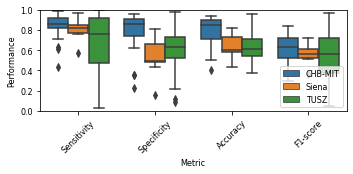

In [4]:
###############################################
input_dir = settings["chb-mit"]["metrics_dir"]
chb_data = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.7_summary.csv")
siena_data = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.7_summary.csv")
tusz_data = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.7_summary.csv")
#################################################

database = (["CHB-MIT"]*len(chb_data) + 
            ["Siena"]*len(siena_data) +
            ["TUSZ"]*len(tusz_data) +
            ["CHB-MIT"]*len(chb_data) + 
            ["Siena"]*len(siena_data) +
            ["TUSZ"]*len(tusz_data) +
            ["CHB-MIT"]*len(chb_data) + 
            ["Siena"]*len(siena_data) +
            ["TUSZ"]*len(tusz_data) +
            ["CHB-MIT"]*len(chb_data) + 
            ["Siena"]*len(siena_data) +
            ["TUSZ"]*len(tusz_data))
values = (chb_data.sensitivity.to_list() + 
          siena_data.sensitivity.to_list() + 
          tusz_data.sensitivity.to_list() + 
          chb_data.specificity.to_list() +
          siena_data.specificity.to_list() + 
          tusz_data.specificity.to_list() + 
          chb_data.accuracy.to_list() + 
          siena_data.accuracy.to_list() + 
          tusz_data.accuracy.to_list() +
          chb_data.f1_score.to_list() + 
          siena_data.f1_score.to_list() + 
          tusz_data.f1_score.to_list())
metrics = (["Sensitivity"]*len(chb_data) + 
           ["Sensitivity"]*len(siena_data) +
           ["Sensitivity"]*len(tusz_data) +
           ["Specificity"]*len(chb_data) + 
           ["Specificity"]*len(siena_data) +
           ["Specificity"]*len(tusz_data) +
           ["Accuracy"]*len(chb_data) + 
           ["Accuracy"]*len(siena_data) +
           ["Accuracy"]*len(tusz_data) + 
           ["F1-score"]*len(chb_data) + 
           ["F1-score"]*len(siena_data) +
           ["F1-score"]*len(tusz_data))

df = pd.DataFrame({"Database": database,
                   "Metric": metrics,
                   "Performance": values})

plot_database_comparison(df, "Metric", "Performance", "Database", "Figure5.png")

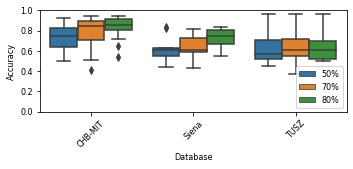

In [5]:
###############################################
input_dir = settings["chb-mit"]["metrics_dir"]
chb_data_0_5 = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.5_summary.csv")
siena_data_0_5 = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.5_summary.csv")
tusz_data_0_5 = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.5_summary.csv")
chb_data_0_7 = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.7_summary.csv")
siena_data_0_7 = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.7_summary.csv")
tusz_data_0_7 = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.7_summary.csv")
chb_data_0_8 = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.8_summary.csv")
siena_data_0_8 = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.8_summary.csv")
tusz_data_0_8 = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.8_summary.csv")
#################################################

database = (["CHB-MIT"]*len(chb_data_0_5) + 
            ["Siena"]*len(siena_data_0_5) +
            ["TUSZ"]*len(tusz_data_0_5) +
            ["CHB-MIT"]*len(chb_data_0_7) + 
            ["Siena"]*len(siena_data_0_7) +
            ["TUSZ"]*len(tusz_data_0_7) +
            ["CHB-MIT"]*len(chb_data_0_8) + 
            ["Siena"]*len(siena_data_0_8) +
            ["TUSZ"]*len(tusz_data_0_8) )
values = (chb_data_0_5.accuracy.to_list() + 
          siena_data_0_5.accuracy.to_list() + 
          tusz_data_0_5.accuracy.to_list() + 
          chb_data_0_7.accuracy.to_list() +
          siena_data_0_7.accuracy.to_list() + 
          tusz_data_0_7.accuracy.to_list() + 
          chb_data_0_8.accuracy.to_list() + 
          siena_data_0_8.accuracy.to_list() + 
          tusz_data_0_8.accuracy.to_list())
overlap = (["50%"]*len(chb_data_0_5) + 
           ["50%"]*len(siena_data_0_5) +
           ["50%"]*len(tusz_data_0_5) +
           ["70%"]*len(chb_data_0_7) + 
           ["70%"]*len(siena_data_0_7) +
           ["70%"]*len(tusz_data_0_7) +
           ["80%"]*len(chb_data_0_8) + 
           ["80%"]*len(siena_data_0_8) +
           ["80%"]*len(tusz_data_0_8))

df = pd.DataFrame({"Database": database,
                   "Overlap": overlap,
                   "Accuracy": values})

plot_database_comparison(df, "Database", "Accuracy", "Overlap", "Figure6.png")

In [9]:
f1scores = [[a, b, c] for (a, b, c) in zip(tusz_data_0_5.accuracy.to_list(),
                                           tusz_data_0_7.accuracy.to_list(),
                                           tusz_data_0_8.accuracy.to_list())]

for index in range(len(f1scores)):
    ordinal_array = [sorted(f1scores[index], reverse=True).index(x) + 1 for x in f1scores[index]]
    f1scores[index] = ordinal_array

ordinal_array = []
for patient in range(len(f1scores[0])):
    patient_order = [experiment[patient] for experiment in f1scores]
    ordinal_array.append(patient_order)

print(friedmanchisquare(*ordinal_array))

FriedmanchisquareResult(statistic=1.2307692307692264, pvalue=0.5404329964865353)


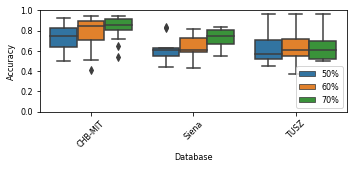

In [3]:
###############################################
input_dir = settings["chb-mit"]["metrics_dir"]
chb_data_0_5 = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.5_summary.csv")
siena_data_0_5 = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.5_summary.csv")
tusz_data_0_5 = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.5_summary.csv")
chb_data_0_7 = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.7_summary.csv")
siena_data_0_7 = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.7_summary.csv")
tusz_data_0_7 = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.7_summary.csv")
chb_data_0_8 = pd.read_csv(f"{input_dir}perf_chb-mit_wang_1d_0.8_summary.csv")
siena_data_0_8 = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.8_summary.csv")
tusz_data_0_8 = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.8_summary.csv")
#################################################

database = (["CHB-MIT"]*len(chb_data_0_5) + 
            ["Siena"]*len(siena_data_0_5) +
            ["TUSZ"]*len(tusz_data_0_5) +
            ["CHB-MIT"]*len(chb_data_0_7) + 
            ["Siena"]*len(siena_data_0_7) +
            ["TUSZ"]*len(tusz_data_0_7) +
            ["CHB-MIT"]*len(chb_data_0_8) + 
            ["Siena"]*len(siena_data_0_8) +
            ["TUSZ"]*len(tusz_data_0_8) )
values = (chb_data_0_5.accuracy.to_list() + 
          siena_data_0_5.accuracy.to_list() + 
          tusz_data_0_5.accuracy.to_list() + 
          chb_data_0_7.accuracy.to_list() +
          siena_data_0_7.accuracy.to_list() + 
          tusz_data_0_7.accuracy.to_list() + 
          chb_data_0_8.accuracy.to_list() + 
          siena_data_0_8.accuracy.to_list() + 
          tusz_data_0_8.accuracy.to_list())
overlap = (["50%"]*len(chb_data_0_5) + 
           ["50%"]*len(siena_data_0_5) +
           ["50%"]*len(tusz_data_0_5) +
           ["60%"]*len(chb_data_0_7) + 
           ["60%"]*len(siena_data_0_7) +
           ["60%"]*len(tusz_data_0_7) +
           ["70%"]*len(chb_data_0_8) + 
           ["70%"]*len(siena_data_0_8) +
           ["70%"]*len(tusz_data_0_8))

df = pd.DataFrame({"Database": database,
                   "Overlap": overlap,
                   "Accuracy": values})

plot_database_comparison(df, "Database", "Accuracy", "Overlap", "test.png")

<h3> SEIZURE TYPE COMPARISON </h3>

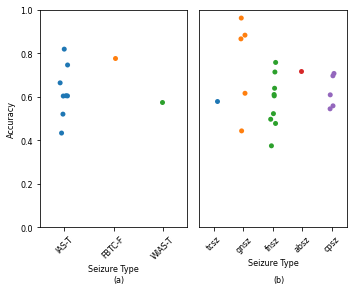

In [7]:
seizure_types = {"258": "tcsz",
                 "492": "gnsz",
                 "529": "fnsz",
                 "675": "absz",
                 "1027": "cpsz",
                 "2806": "cpsz",
                 "2991": "fnsz",
                 "4456": "gnsz",
                 "5479": "cpsz",
                 "6440": "fnsz",
                 "6514": "gnsz",
                 "6546": "fnsz",
                 "6563": "fnsz",
                 "6811": "cpsz",
                 "6904": "cpsz",
                 "7235": "fnsz",
                 "8512": "gnsz",
                 "9839": "fnsz",
                 "9866": "fnsz",
                 "10022": "fnsz",
                 "10639": "gnsz",
                 "PN00": "IAS-T",
                 "PN05": "IAS-T",
                 "PN06": "IAS-T",
                 "PN09": "IAS-T",
                 "PN10": "FBTC-F",
                 "PN12": "IAS-T",
                 "PN13": "IAS-T",
                 "PN14": "WIAS-T",
                 "PN16": "IAS-T",
                 "PN17": "IAS-T"
                 }

###############################################
input_dir = settings["chb-mit"]["metrics_dir"]
siena_data = pd.read_csv(f"{input_dir}perf_siena_wang_1d_0.7_summary.csv")
tusz_data = pd.read_csv(f"{input_dir}perf_tusz_wang_1d_0.7_summary.csv")
#################################################
siena_data["Seizure Type"] = siena_data["patient"].apply(lambda x: seizure_types[str(x)])
siena_data = siena_data.rename(columns={"accuracy": "Accuracy"})
tusz_data["Seizure Type"] = tusz_data["patient"].apply(lambda x: seizure_types[str(x)])
tusz_data = tusz_data.rename(columns={"accuracy": "Accuracy"})

plot_seizure_comparison(siena_data, tusz_data, "Seizure Type", "Accuracy", "Figure7.png")